# Análise de Dados

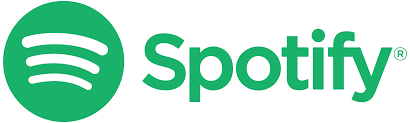

Davi Trost Gouveia					PC3010741

Mateus Augusto Viotto				PC3008967

Pedro Barriviera					PC3010155

# Dataframe das Músicas

### Importando as bibliotecas

In [98]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from io import BytesIO
import requests
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px

Importamos todas a bibliotecas necessárias para as análises  

## Juntando os arquivos dos dataframes

In [99]:
diretorioM = "./DataFrames/Musicas"
arquivosM = [arquivo for arquivo in os.listdir(diretorioM) if not arquivo.startswith('.')] # filtra essa lista, mantendo apenas os arquivos que não começam com "." (ponto).

df_musicas = pd.DataFrame()

for arquivo in arquivosM:
    data_atual = pd.read_csv(diretorioM+"/"+arquivo)
    df_musicas = pd.concat([df_musicas, data_atual])
    
diretorioU = "./DataFrames/Usuários"
arquivosU = [arquivo for arquivo in os.listdir(diretorioU) if not arquivo.startswith('.')] #Ignora arquivos escondidos

df_usuarios = pd.DataFrame()

for arquivo in arquivosU:
    data_atual = pd.read_csv(diretorioU+"/"+arquivo)
    data_atual['usuário'] = arquivo[:-4]
    df_usuarios = pd.concat([df_usuarios, data_atual])

Criamos o data frame ‘df_musicas’ e um for percorrerá cada arquivo da lista, e irá ler os arquivos CSV e os armazenar em data_atual e depois o adicionar ao DataFrame "df_musicas"

In [100]:
display(df_musicas.head(3))
df_usuarios.head(3)

Unnamed: 0                track_id             track_name  artist_name  \
0           0  4uqJelb9THHmJ3OCohg4ZJ           Nosso Quadro  Ana Castela   
1           1  0SCMVUZ21uYYB8cc0ScfbV  Bombonzinho - Ao Vivo  Ana Castela   
2           2  0redQHBfejmPUhonR5ppGC              Duas Três  Ana Castela   

                              artist_genres                    album_name  \
0  ['agronejo', 'funk rj', 'sertanejo pop']                  Nosso Quadro   
1  ['agronejo', 'funk rj', 'sertanejo pop']  Let's Bora, Vol. 2 (Ao Vivo)   
2  ['agronejo', 'funk rj', 'sertanejo pop']                     Duas Três   

                artist_id  popularity  duration_ms  explicit  ...  key  \
0  2CKOmarVWvWqkNWUatHCex          84       173698     False  ...    9   
1  2CKOmarVWvWqkNWUatHCex          79       154701     False  ...    1   
2  2CKOmarVWvWqkNWUatHCex          87       156942     False  ...    5   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -4.821     1       0.1950         0.338               0.0     0.311   
1    -3.672     1       0.0548         0.300               0.0     0.920   
2    -3.746     0       0.2010         0.574               0.0     0.689   

   valence    tempo  time_signature  
0    0.602  160.018               4  
1    0.706  158.054               4  
2    0.721  159.918               4  

[3 rows x 22 columns]

Unnamed: 0                track_id       track_name    artist_name  \
0           0  7wdwIaXUuzlu1grzWMFRJm  Mary On A Cross          Ghost   
1           1  6I3mqTwhRpn34SLVafSH7G            Ghost  Justin Bieber   
2           2  1daDRI9ahBonbWD8YcxOIB  Angels Like You    Miley Cyrus   

             artist_genres                 album_name               artist_id  \
0   ['hard rock', 'metal']  [MESSAGE FROM THE CLERGY]  1Qp56T7n950O3EGMsSl81D   
1  ['canadian pop', 'pop']                    Justice  1uNFoZAHBGtllmzznpCI3s   
2                  ['pop']             Plastic Hearts  5YGY8feqx7naU7z4HrwZM6   

   popularity  duration_ms  explicit  ...  mode  speechiness  acousticness  \
0          77       244804     False  ...     1       0.0451      0.000187   
1          89       153190     False  ...     1       0.0478      0.185000   
2          94       196453     False  ...     1       0.0313      0.098100   

   instrumentalness  liveness  valence    tempo  time_signature  \
0          0.000493     0.105    0.554  130.027               4   
1          0.000029     0.415    0.441  153.960               4   
2          0.000000     0.100    0.494  121.981               4   

                                           album_img  usuário  
0  https://i.scdn.co/image/ab67616d00001e02f7dbc5...     Anne  
1  https://i.scdn.co/image/ab67616d00001e02e6f407...     Anne  
2  https://i.scdn.co/image/ab67616d00001e028cffb7...     Anne  

[3 rows x 24 columns]

 Verificamos DataFrame obtendo uma visualização das primeiras linhas para constatar se tudo correu como desejado

## Análise exploratória de dados

### Informações sobre as colunas

In [101]:
print("Tamanho do dataframe de músicas: ",df_musicas.shape)
print("Tamanho do dataframe de usuários: ",df_usuarios.shape)

Tamanho do dataframe de músicas:  (18530, 22)
Tamanho do dataframe de usuários:  (552, 24)


Verificamos as dimensões do DataFrame

In [102]:
df_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18530 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18530 non-null  int64  
 1   track_id          18530 non-null  object 
 2   track_name        18530 non-null  object 
 3   artist_name       18530 non-null  object 
 4   artist_genres     18530 non-null  object 
 5   album_name        18530 non-null  object 
 6   artist_id         18530 non-null  object 
 7   popularity        18530 non-null  int64  
 8   duration_ms       18530 non-null  int64  
 9   explicit          18530 non-null  bool   
 10  danceability      18530 non-null  float64
 11  energy            18530 non-null  float64
 12  key               18530 non-null  int64  
 13  loudness          18530 non-null  float64
 14  mode              18530 non-null  int64  
 15  speechiness       18530 non-null  float64
 16  acousticness      18530 non-null  float64


In [103]:
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 19
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        552 non-null    int64  
 1   track_id          552 non-null    object 
 2   track_name        549 non-null    object 
 3   artist_name       549 non-null    object 
 4   artist_genres     552 non-null    object 
 5   album_name        552 non-null    object 
 6   artist_id         552 non-null    object 
 7   popularity        552 non-null    int64  
 8   duration_ms       552 non-null    int64  
 9   explicit          552 non-null    bool   
 10  danceability      552 non-null    float64
 11  energy            552 non-null    float64
 12  key               552 non-null    int64  
 13  loudness          552 non-null    float64
 14  mode              552 non-null    int64  
 15  speechiness       552 non-null    float64
 16  acousticness      552 non-null    float64
 17

Verificamos número de entradas não nulas em cada coluna, o tipo de dados e o uso de memória do DataFrame

### Análise estatísticas

In [104]:
df_musicas.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count  18530.000000  18530.000000  1.853000e+04  18530.000000  18530.000000   
mean     343.677280     64.235240  2.114685e+05      0.643922      0.642482   
std      255.661231     13.705277  8.564012e+04      0.159136      0.194660   
min        0.000000      0.000000  3.098500e+04      0.000000      0.000019   
25%      133.000000     56.000000  1.654808e+05      0.545000      0.516000   
50%      297.000000     66.000000  1.987265e+05      0.656000      0.661000   
75%      477.000000     74.000000  2.372000e+05      0.760000      0.791000   
max      999.000000    100.000000  4.120258e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  18530.000000  18530.000000  18530.000000  18530.000000  18530.000000   
mean       5.327847     -6.964229      0.602752      0.115248      0.299637   
std        3.607230      3.876945      0.489341      0.118028      0.273524   
min        0.000000    -43.820000      0.000000      0.000000      0.000000   
25%        2.000000     -8.350500      0.000000      0.038200      0.054600   
50%        5.000000     -6.250500      1.000000      0.059700      0.220000   
75%        9.000000     -4.622000      1.000000      0.147000      0.501000   
max       11.000000      3.064000      1.000000      0.945000      0.995000   

       instrumentalness      liveness       valence         tempo  \
count      18530.000000  18530.000000  18530.000000  18530.000000   
mean           0.042117      0.214110      0.535415    122.804919   
std            0.165309      0.196557      0.237390     28.420650   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098000      0.353000     99.992000   
50%            0.000000      0.130000      0.545000    123.832500   
75%            0.000143      0.261000      0.725000    140.078000   
max            0.999000      0.993000      0.993000    220.099000   

       time_signature  
count    18530.000000  
mean         3.961954  
std          0.363789  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [105]:
df_usuarios.describe()

Unnamed: 0  popularity   duration_ms  danceability      energy  \
count  552.000000  552.000000  5.520000e+02    552.000000  552.000000   
mean     9.385870   56.496377  2.139687e+05      0.604029    0.674057   
std      5.731881   30.040565  2.164480e+05      0.156733    0.206374   
min      0.000000    0.000000  0.000000e+00      0.000000    0.018500   
25%      4.000000   40.500000  1.692310e+05      0.509750    0.556500   
50%      9.000000   69.000000  1.982150e+05      0.605000    0.705000   
75%     14.000000   80.000000  2.318995e+05      0.709750    0.834250   
max     19.000000   98.000000  5.019840e+06      0.975000    1.000000   

              key    loudness        mode  speechiness  acousticness  \
count  552.000000  552.000000  552.000000   552.000000    552.000000   
mean     5.365942   -6.920431    0.579710     0.093729      0.299067   
std      3.583609    3.990933    0.494053     0.096827      0.284462   
min      0.000000  -29.840000    0.000000     0.000000      0.000005   
25%      2.000000   -8.201000    0.000000     0.038775      0.048200   
50%      6.000000   -5.899500    1.000000     0.055550      0.198500   
75%      9.000000   -4.455250    1.000000     0.100250      0.498000   
max     11.000000    5.759000    1.000000     0.891000      0.995000   

       instrumentalness    liveness     valence       tempo  time_signature  
count        552.000000  552.000000  552.000000  552.000000      552.000000  
mean           0.081914    0.256249    0.507773  123.002076        3.942029  
std            0.232552    0.236416    0.237276   28.897354        0.376595  
min            0.000000    0.000000    0.000000    0.000000        0.000000  
25%            0.000000    0.098500    0.322750   98.955000        4.000000  
50%            0.000002    0.141000    0.518500  124.075000        4.000000  
75%            0.000931    0.338750    0.681250  140.048000        4.000000  
max            0.974000    0.982000    0.970000  199.886000        5.000000

### Verificando se existem valores nulos no dataframe

In [106]:
print("Contagem de valores nulos no dataframe de músicas: ", df_musicas.isnull().sum().sum())
print("Contagem de valores nulos no dataframe de usuários: ", df_usuarios.isnull().sum().sum())

Contagem de valores nulos no dataframe de músicas:  0
Contagem de valores nulos no dataframe de usuários:  6


Constatamos que há apenas 6 valores nulos no dataframe de usuários

## Tratando o dataframe

### Excluindo a coluna "Unnamed: 0"

Os arquivos CSVs trouxeram uma coluna “Unnamed: 0” que era usada como índice que para nossa análise não é relevante  

In [107]:
df_musicas = df_musicas.drop("Unnamed: 0", axis=1)
df_usuarios = df_usuarios.drop("Unnamed: 0", axis=1)
df_musicas.head(1)

track_id    track_name  artist_name  \
0  4uqJelb9THHmJ3OCohg4ZJ  Nosso Quadro  Ana Castela   

                              artist_genres    album_name  \
0  ['agronejo', 'funk rj', 'sertanejo pop']  Nosso Quadro   

                artist_id  popularity  duration_ms  explicit  danceability  \
0  2CKOmarVWvWqkNWUatHCex          84       173698     False         0.691   

   ...  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  ...    9    -4.821     1        0.195         0.338               0.0   

   liveness  valence    tempo  time_signature  
0     0.311    0.602  160.018               4  

[1 rows x 21 columns]

Constatando que o Índice do CSV foi removido 

### Inserimos os valores do dataframe usuário no dataframe músicas

In [108]:
df_usuarios_juncao = df_usuarios.drop(["album_img","usuário"], axis=1)

df_musicas = pd.concat([df_usuarios_juncao, df_musicas])

df_musicas = df_musicas.drop_duplicates(keep='first')

df_musicas.shape

(14480, 21)

### Dropamos os valores nulos

In [109]:
df_musicas = df_musicas.dropna()

### Excluindo as linhas duplicadas

### Renomeando as colunas para português

Para facilitar na análise, renomeamos as colunas para português

In [110]:
df_musicas.rename(columns={'track_id': 'id_da_faixa',
                        'track_name': 'nome_da_faixa',
                        'artist_name': 'nome_do_artista',
                        'artist_genres': 'generos_do_artista',
                        'album_name': 'nome_do_album',
                        'artist_id': 'id_do_artista',
                        'popularity': 'popularidade',
                        'duration_ms': 'duracao_ms',
                        'explicit': 'explicita',
                        'danceability': 'danceabilidade',
                        'energy': 'energia',
                        'key': 'tonalidade',
                        'loudness': 'volume',
                        'mode': 'modalidade',
                        'speechiness': 'fala',
                        'acousticness': 'acusticidade',
                        'instrumentalness': 'instrumentalidade',
                        'liveness': 'aovivo',
                        'valence': 'positividade',
                        'tempo': 'tempo',
                        'time_signature': 'assinatura_tempo'}, inplace=True)

df_usuarios.rename(columns={'track_id': 'id_da_faixa',
                        'track_name': 'nome_da_faixa',
                        'artist_name': 'nome_do_artista',
                        'artist_genres': 'generos_do_artista',
                        'album_name': 'nome_do_album',
                        'artist_id': 'id_do_artista',
                        'popularity': 'popularidade',
                        'duration_ms': 'duracao_ms',
                        'explicit': 'explicita',
                        'danceability': 'danceabilidade',
                        'energy': 'energia',
                        'key': 'tonalidade',
                        'loudness': 'volume',
                        'mode': 'modalidade',
                        'speechiness': 'fala',
                        'acousticness': 'acusticidade',
                        'instrumentalness': 'instrumentalidade',
                        'liveness': 'aovivo',
                        'valence': 'positividade',
                        'tempo': 'tempo',
                        'time_signature': 'assinatura_tempo'}, inplace=True)

### Criação de uma nova coluna para a duração das músicas em minutos

In [111]:
df_musicas['duracao_ms'].dtype

dtype('int64')

Verificamos se o valor da coluna 'duracao_ms' é um valor inteiro para realizar a conversão

In [112]:
df_musicas['duracao_min'] = pd.to_datetime(df_musicas['duracao_ms'], unit='ms').dt.strftime('%H:%M:%S')
df_musicas.head()

id_da_faixa    nome_da_faixa  nome_do_artista  \
0  7wdwIaXUuzlu1grzWMFRJm  Mary On A Cross            Ghost   
1  6I3mqTwhRpn34SLVafSH7G            Ghost    Justin Bieber   
2  1daDRI9ahBonbWD8YcxOIB  Angels Like You      Miley Cyrus   
3  6jugu0rJWQUxwP6YekuYh7      Miley Cyrus  Ying Yang Twins   
4  66tHO11PSLP7u25A6XM4iR       Love, Love   Cedarmont Kids   

                                  generos_do_artista  \
0                             ['hard rock', 'metal']   
1                            ['canadian pop', 'pop']   
2                                            ['pop']   
3  ['atl hip hop', 'crunk', 'dirty south rap', 'o...   
4                                            ['vbs']   

               nome_do_album           id_do_artista  popularidade  \
0  [MESSAGE FROM THE CLERGY]  1Qp56T7n950O3EGMsSl81D            77   
1                    Justice  1uNFoZAHBGtllmzznpCI3s            89   
2             Plastic Hearts  5YGY8feqx7naU7z4HrwZM6            94   
3              Twerking Hitz  44PA0rCQXikgOWbfY7Fq7m             0   
4            Songs Of Praise  0MCU2OpgnSB7rm5UPUMHgt             8   

   duracao_ms  explicita  danceabilidade  ...  volume  modalidade    fala  \
0      244804      False           0.467  ...  -4.505           1  0.0451   
1      153190      False           0.601  ...  -5.569           1  0.0478   
2      196453      False           0.672  ...  -4.035           1  0.0313   
3      216659      False           0.762  ...  -5.074           0  0.0781   
4      142960      False           0.577  ... -18.084           0  0.0310   

   acusticidade  instrumentalidade  aovivo  positividade    tempo  \
0      0.000187           0.000493  0.1050         0.554  130.027   
1      0.185000           0.000029  0.4150         0.441  153.960   
2      0.098100           0.000000  0.1000         0.494  121.981   
3      0.007310           0.000182  0.2180         0.402   98.060   
4      0.898000           0.000000  0.0794         0.491  129.640   

   assinatura_tempo  duracao_min  
0                 4     00:04:04  
1                 4     00:02:33  
2                 4     00:03:16  
3                 4     00:03:36  
4                 4     00:02:22  

[5 rows x 22 columns]

Através das funções de conversão, criamos a coluna  'duracao_min' que representa a duração em minutos e segundos, com base na coluna 'duracao_ms'.

## Primeiras análises

Somando todos os valores onde o id da faixa é maior que 1 temos o total de Feats presentes no banco de dados

In [113]:
(df_musicas['id_da_faixa'].value_counts() > 1).sum()

1687

Podemos notar que a música “Camarão Que Dorme a Onda Leva” de id “7lzfMZak2HjNPXXSxksjPB” é um feat com 12 artistas

In [114]:
df_musicas.loc[df_musicas['id_da_faixa'] == '7lzfMZak2HjNPXXSxksjPB']

id_da_faixa                  nome_da_faixa nome_do_artista  \
894  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva        Péricles   
60   7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva    Arlindo Cruz   
340  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva   Jorge Ben Jor   
371  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Lenine   
273  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva         Alcione   
479  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva   Beth Carvalho   
492  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Frejat   
398  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva      Maria Rita   
360  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Djavan   
208  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva       Mumuzinho   
272  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva         Emicida   
0    7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva  Zeca Pagodinho   

                                    generos_do_artista  \
894                          ['pagode', 'pagode novo']   
60           ['mpb', 'pagode', 'pagode novo', 'samba']   
340  ['bossa nova', 'manguebeat', 'mpb', 'samba', '...   
371  ['bossa nova', 'brazilian rock', 'manguebeat',...   
273  ['mpb', 'musica maranhense', 'pagode', 'pagode...   
479  ['bossa nova', 'mpb', 'pagode', 'partido alto'...   
492                ['mpb', 'rock nacional brasileiro']   
398           ['bossa nova', 'mpb', 'pagode', 'samba']   
360                         ['mpb', 'musica alagoana']   
208                          ['pagode', 'pagode novo']   
272  ['afrofuturismo brasileiro', 'brazilian hip ho...   
0    ['mpb', 'pagode', 'partido alto', 'samba', 'sa...   

                        nome_do_album           id_do_artista  popularidade  \
894  Sambabook Zeca Pagodinho, Vol. 2  6gEzJZrbm0F4ihvE9iXR9z            64   
60   Sambabook Zeca Pagodinho, Vol. 2  096an3uS6ZaK2XySae6SqP            64   
340  Sambabook Zeca Pagodinho, Vol. 2  5JYtpnUKxAzXfHEYpOeeit            64   
371  Sambabook Zeca Pagodinho, Vol. 2  4YLBdrR3DVSMncm785NH6C            64   
273  Sambabook Zeca Pagodinho, Vol. 2  0hPar6ePAELiu9rYMdvMEo            64   
479  Sambabook Zeca Pagodinho, Vol. 2  56TkPi7rpmU8jTpkcK7FY3            64   
492  Sambabook Zeca Pagodinho, Vol. 2  3WVjDclrbHsxjxhiOqHdnw            64   
398  Sambabook Zeca Pagodinho, Vol. 2  1C8UBSZs5rOPfxuxTMS6OI            64   
360  Sambabook Zeca Pagodinho, Vol. 2  5rrmaoBXZ7Jcs4Qb77j0YA            64   
208  Sambabook Zeca Pagodinho, Vol. 2  34dfPo3Zi55yM6oV46q4y7            64   
272  Sambabook Zeca Pagodinho, Vol. 2  2d9LRvQJnAXRijqIJDDs2K            64   
0    Sambabook Zeca Pagodinho, Vol. 2  3qZ2n5keOAat1SoF6bHwmb            64   

     duracao_ms  explicita  danceabilidade  ...  volume  modalidade    fala  \
894      168948      False           0.723  ...  -6.694           1  0.0802   
60       168948      False           0.723  ...  -6.694           1  0.0802   
340      168948      False           0.723  ...  -6.694           1  0.0802   
371      168948      False           0.723  ...  -6.694           1  0.0802   
273      168948      False           0.723  ...  -6.694           1  0.0802   
479      168948      False           0.723  ...  -6.694           1  0.0802   
492      168948      False           0.723  ...  -6.694           1  0.0802   
398      168948      False           0.723  ...  -6.694           1  0.0802   
360      168948      False           0.723  ...  -6.694           1  0.0802   
208      168948      False           0.723  ...  -6.694           1  0.0802   
272      168948      False           0.723  ...  -6.694           1  0.0802   
0        168948      False           0.723  ...  -6.694           1  0.0802   

     acusticidade  instrumentalidade  aovivo  positividade    tempo  \
894         0.313                0.0   0.052         0.739  106.359   
60          0.313                0.0   0.052    

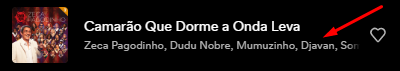

### Agrupando os artistas
<p>Para evitar dados repetidos, vamos agrupar os artistas em apenas uma música</p>

In [115]:
# O dicionário "agg_functions" contém um conjunto de funções de agregação que definem como cada coluna deve ser agregada.

# first guarda a primeira aparição

# .join concatena os valores dentro do grupo

agg_functions = {
    'nome_da_faixa': 'first',
    'nome_do_artista': ','.join,
    'generos_do_artista': 'first',
    'nome_do_album': 'first',
    'id_do_artista': ','.join,
    'popularidade': 'first',
    'duracao_ms': 'first',
    'explicita': 'first',
    'danceabilidade': 'first',
    'energia': 'first',
    'tonalidade': 'first',
    'volume': 'first',
    'modalidade': 'first',
    'fala': 'first',
    'acusticidade': 'first',
    'instrumentalidade': 'first',
    'aovivo': 'first',
    'positividade': 'first',
    'tempo': 'first',
    'assinatura_tempo': 'first',
    'duracao_min' : 'first'
}

In [116]:
# Agrupando o dataframe com base na coluna 'id_da_faixa' aplicando a função de agregação definida no dicionário

df_musicas_grouped = df_musicas.groupby('id_da_faixa').agg(agg_functions).reset_index()

df_musicas_grouped['id_da_faixa'].size

#Aplicando as músicas agrupadas para o dataframe
df_musicas = df_musicas_grouped

# Verificando a quantidade de linhas, houve redução de 1.981 linhas
df_musicas.shape

(12374, 22)

### Verificando os valores de algumas colunas

#### Coluna popularidade

A popularidade de uma música é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada no número total de reproduções que a faixa teve e quão recentes são essas reproduções. O valor altera periodicamente e esses valores devem ser considerados do mês de Junho de 2023.

In [117]:
df_musicas['popularidade'].describe()

count    12374.000000
mean        61.835138
std         14.844161
min          0.000000
25%         54.000000
50%         63.000000
75%         72.000000
max        100.000000
Name: popularidade, dtype: float64

In [118]:
# Configurando o boxplot
fig = go.Figure()
fig.add_trace(go.Box(y=df_musicas['popularidade'], 
                     boxmean='sd', 
                     marker_color='#00FF00', 
                     line_color='#000000', 
                     fillcolor='#00FF00'))

# Personalizando o layout do gráfico
fig.update_layout(
    title='Boxplot da Popularidade das Músicas',
    yaxis=dict(title='Popularidade'),
    xaxis=dict(title=''),
    showlegend=False,
    boxmode='group'
)

# Exibindo o gráfico
fig.show()

### Gerador de Gráfico Pizza

In [119]:
def gerarGraficoPizza(coluna):
        
    # Contagem dos valores da coluna 'tonalidade'
    contagem_tonalidade = df_musicas[coluna].value_counts()

    # Criação do gráfico de pizza
    fig = go.Figure(data=go.Pie(
        labels=contagem_tonalidade.index,
        values=contagem_tonalidade.values,
        hoverinfo='label+percent',
        textinfo='value+percent',
        textfont=dict(size=14),
        marker=dict(colors=px.colors.sequential.Turbo),
        pull=[0.03] * len(contagem_tonalidade.index)  # Ajuste o valor para alterar o espaçamento
        
    ))

    # Configurações de layout do gráfico
    fig.update_layout(
        title='Gráfico coluna: ' + coluna,
    )

    # Exibição do gráfico
    fig.show()

#### Coluna assinatura_tempo

Uma convenção de notação para especificar quantas batidas há em cada compasso.A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de "3/4" a "7/4".
É uma métrica que varia de 0 a 5 onde 0 é o  mais proximo de 3/4 e 5 de 7/4

In [120]:
gerarGraficoPizza('assinatura_tempo')

#### Coluna modalidade

O tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor por 0

In [121]:
gerarGraficoPizza('modalidade')

#### Coluna explicita

Se a música possui ou não conteúdo explícito

In [122]:
gerarGraficoPizza('explicita')

#### Coluna Tonalidade

A tonalidade em que a faixa está.Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante, se nenhuma chave for detectada, o valor é -1

In [123]:
gerarGraficoPizza('tonalidade')

## Classificando os dados

### Músicas por Artistas
<p>Devido ao modo de captura dos dados, o maior valor de músicas por artista será 20.</p>

In [124]:
df_tracksbyArtists = df_musicas[['id_do_artista','nome_do_artista']].value_counts()

print(df_musicas['id_do_artista'].unique().size, 'artistas no total.')

print(df_tracksbyArtists.mean())
display(df_tracksbyArtists)

2523 artistas no total.
4.9044787950852164


id_do_artista                                                         nome_do_artista                    
5M52tdBnJaKSvOpJGz8mfZ                                                Black Sabbath                          20
7bu3H8JO7d0UbMoVzbo70s                                                The Cure                               20
2ye2Wgw4gimLv2eAKyk1NB                                                Metallica                              19
2FXC3k01G6Gw61bmprjgqS                                                Hozier                                 18
3q7HBObVc0L8jNeTe5Gofh                                                50 Cent                                15
                                                                                                             ..
5he1UTofdFOcdbKqnLixko                                                Matogrosso & Mathias                    1
1Cs0zKBU1kc0i8ypK3B9ai,1Cs0zKBU1kc0i8ypK3B9ai,6AMd49uBDJfhf30Ak2QR5s  David Guetta,David Guetta,Coi Leray     

### Músicas com a maior popularidade

In [125]:
df_toptracks = df_musicas.sort_values('popularidade',ascending = False).head(100)

df_toptracks_view = df_toptracks[['id_da_faixa','nome_da_faixa', 'nome_do_artista', 'popularidade']].copy()
df_toptracks_view.reset_index()[['id_da_faixa','nome_da_faixa', 'nome_do_artista','popularidade']]

id_da_faixa                            nome_da_faixa  \
0   6pD0ufEQq0xdHSsRbg9LBK                                un x100to   
1   2UW7JaomAMuX9pZrjVpHAU                          La Bebe - Remix   
2   7ro0hRteUMfnOioTFI5TG1                           WHERE SHE GOES   
3   7FbrGaHYVDmfr7KoLIZnQ7                        Cupid - Twin Ver.   
4   1odExI7RdWc4BT515LTAwj                                 Daylight   
..                     ...                                      ...   
95  1dGr1c8CrMLDpV6mPbImSI                                    Lover   
96  6GGtHZgBycCgGBUhZo81xe                        Say Yes To Heaven   
97  3azJifCSqg9fRij2yKIbWz                         The Color Violet   
98  0FA4wrjDJvJTTU8AepZTup  Watch This - ARIZONATEARS Pluggnb Remix   
99  0nJW01T7XtvILxQgC5J7Wh                      When I Was Your Man   

                                nome_do_artista  popularidade  
0                                     Bad Bunny           100  
1                                    Peso Pluma            99  
2                                     Bad Bunny            99  
3                                   FIFTY FIFTY            98  
4                   David Kushner,David Kushner            98  
..                                          ...           ...  
95                                 Taylor Swift            90  
96                    Lana Del Rey,Lana Del Rey            90  
97                                   Tory Lanez            89  
98  sped up nightcore,Lil Uzi Vert,ARIZONATEARS            89  
99                                   Bruno Mars            89  

[100 rows x 4 columns]

### Artistas com a maior popularidade

In [126]:
# Agrupando o ID do artista e seu nome por popularidade
df_grouped_artist = df_musicas.groupby(['id_do_artista', 'nome_do_artista'])['popularidade'].sum().reset_index()

# Filtrando por maior popularidade
df_artist_sorted = df_grouped_artist.sort_values(by='popularidade', ascending=False)

# Display dos Top 10 Artistas e seus IDs
most_popular_artists = df_artist_sorted[['id_do_artista', 'nome_do_artista']].reset_index()[['id_do_artista', 'nome_do_artista']]
most_popular_artists.head(10)

id_do_artista nome_do_artista
0  2ye2Wgw4gimLv2eAKyk1NB       Metallica
1  7bu3H8JO7d0UbMoVzbo70s        The Cure
2  2FXC3k01G6Gw61bmprjgqS          Hozier
3  5M52tdBnJaKSvOpJGz8mfZ   Black Sabbath
4  3q7HBObVc0L8jNeTe5Gofh         50 Cent
5  6jJ0s89eD6GaHleKKya26X      Katy Perry
6  1Qp56T7n950O3EGMsSl81D           Ghost
7  4phGZZrJZRo4ElhRtViYdl      Jason Mraz
8  6eUKZXaKkcviH0Ku9w2n3V      Ed Sheeran
9  06HL4z0CvFAxyc27GXpf02    Taylor Swift

### Gêneros mais populares (baseado no gênero dos artistas)
<p>Nessa análise foi filtrado os artistas com gêneros [], poís estes são os que não possuem classificação de gênero pelo Spotify.</p>

In [127]:
# Agrupando os gêneros por popularidade
df_grouped_genres = df_musicas.groupby('generos_do_artista')['popularidade'].sum().reset_index()

# Filtrando gêneros não classificados
df_grouped_genres = df_grouped_genres[df_grouped_genres['generos_do_artista'] != '[]']

# Filtrando por maior popularidade
df_genres_sorted = df_grouped_genres.sort_values(by='popularidade', ascending=False)

# Display dos Top 100 Gêneros de artistas e suas popularidades
most_popular_genres = df_genres_sorted[['generos_do_artista', 'popularidade']].reset_index()[['generos_do_artista', 'popularidade']]
most_popular_genres.head(100)

generos_do_artista  popularidade
0                                 ['trap brasileiro']         12460
1                                             ['pop']         11777
2                                ['brazilian gospel']          9773
3                                ['dance pop', 'pop']          6723
4                                         ['arrocha']          6019
..                                                ...           ...
95  ['dance pop', 'hip pop', 'r&b', 'urban contemp...          1110
96              ['alternative r&b', 'lgbtq+ hip hop']          1108
97  ['baroque pop', 'modern rock', 'neo mellow', '...          1102
98                                     ['neo mellow']          1099
99                                     ['trap queen']          1098

[100 rows x 2 columns]

#### Separando os gêneros
<p>Separando os gêneros para verificar sua popularidade</p>

In [128]:
#Copiando o dataframe
df_generos_artistas = df_musicas.copy()

#Separando os Gêneros
df_generos_artistas['generos'] = df_generos_artistas['generos_do_artista'].str.strip('[]').str.split(',')

#Criando linhas indivíduais para cada gênero
df_generos_artistas_separado = df_generos_artistas.explode('generos')

In [129]:
# Agrupando os gêneros por popularidade
df_separated_genres = df_generos_artistas_separado.groupby('generos')['popularidade'].sum().reset_index()

df_separated_genres = df_separated_genres[df_separated_genres['generos'] != '']

# Filtrando por maior popularidade
df_separeted_genres_sorted = df_separated_genres.sort_values(by='popularidade', ascending=False)

most_popular_genres_separated = df_separeted_genres_sorted[['generos', 'popularidade']].reset_index()[['generos', 'popularidade']]

most_popular_genres_separated['generos'] = most_popular_genres_separated['generos'].str.replace("'", "").str.lstrip()
# Display dos Top 20 Gêneros de artistas e suas popularidades
most_popular_genres_separated = most_popular_genres_separated.groupby('generos')['popularidade'].sum().reset_index()
most_popular_genres_separated = most_popular_genres_separated.sort_values(by='popularidade', ascending=False)

most_popular_genres_separated

generos  popularidade
526                      pop         88764
603                     rock         64402
573                      rap         63658
326                  hip hop         37922
646  sertanejo universitario         35686
..                       ...           ...
254             experimental             0
160   christmas instrumental             0
138           cante flamenco             0
131            canadian folk             0
42                 anti-folk             0

[777 rows x 2 columns]

In [130]:
# Obter os top 20 gêneros por popularidade
top_20_generos = most_popular_genres_separated.groupby('generos')['popularidade'].mean().nlargest(20)

# Criar o gráfico de barras
fig = go.Figure(data=go.Bar(
    x=top_20_generos.index,
    y=top_20_generos.values,
    marker=dict(
        color='#1DB954',
        line=dict(
            color='#000000',
            width=1
        )
    )
))

# Personalizar a aparência
fig.update_layout(
    title='Top 20 Gêneros por Popularidade',
    xaxis=dict(
        title='Gêneros',
        tickangle=45,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Popularidade',
        titlefont=dict(size=14),
        tickfont=dict(size=12)
    ),
    plot_bgcolor='#F9F9F9',
    bargap=0.1,
    bargroupgap=0.05
)

# Configurar estilos dos ticks
fig.update_xaxes(tickfont=dict(size=12))
fig.update_yaxes(tickfont=dict(size=12))

# Exibir o gráfico
fig.show()

### Músicas com as maiores durações

In [131]:
df_maiorDuracao = df_musicas[["nome_da_faixa","nome_do_artista", "duracao_min", "duracao_ms"]].sort_values(by="duracao_min",ascending=False)[:20]

df_maiorDuracao = df_maiorDuracao.reset_index()[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']]
df_maiorDuracao = df_maiorDuracao.drop_duplicates(keep='last')
df_maiorDuracao

nome_da_faixa  \
0                               2015 Electro Club Mix   
1                                  Ocean Waves Sounds   
2                          Bloco Do Polly 2.0 Hitmado   
3                            Tu És o Centro (Ao Vivo)   
4                           Poetas no Topo 3.3, Pt. 1   
5   Chato Pa Carai / Recaída / Vai Me Dando Corda ...   
6                                Seu Amor Me Persegue   
7                             Preciso de Ti - Ao Vivo   
8                                    Me Ama - Ao Vivo   
9               Shine On You Crazy Diamond (Pts. 1-5)   
10                                     Bloco Do Polly   
11                                  Love Acústico 2.0   
12                                           Mugiwara   
13                        Hit do Ano - O Peso da Luta   
14                         Eu Te Levantarei (Ao Vivo)   
15               Poesia Acústica #5: Teu Popô - Remix   
16                                     Em Teus Braços   
17  Refiner (feat. Chandler Moore & Steffany Gretz...   
18                                       Bloco Putetê   
19                      Nada Que o Teu Amor Não Possa   

                                      nome_do_artista duracao_min  duracao_ms  
0                                          DJ Collins    01:23:39     5019840  
1                                        Ocean Sounds    01:08:40     4120258  
2                                         Oh Polêmico    00:30:31     1831455  
3                                         Frei Gilson    00:22:37     1357451  
4                                 Bob do Contra,Dk 47    00:19:07     1147406  
5                                            Vou Zuar    00:18:05     1085565  
6                                                AMÉM    00:17:15     1035895  
7                                     Diante do Trono    00:15:19      919733  
8                                     Diante do Trono    00:14:35      875866  
9                               Pink Floyd,Pink Floyd    00:13:31      811077  
10                                        Oh Polêmico    00:13:07      787725  
11                                       Belle Kaffer    00:13:06      786358  
12                                                Sid    00:12:59      779404  
13  MC Marks,MC Leozinho ZS,Mc Kelvinho,Mc Vitão D...    00:12:24      744727  
14                                        Frei Gilson    00:12:23      743240  
15                             Chris MC,Luccas Carlos    00:12:17      737704  
16                                   Laura Souguellis    00:12:15      735253  
17                                Maverick City Music    00:12:12      732553  
18                                        Oh Polêmico    00:12:10      730090  
19                                   Laura Souguellis    00:12:08      728829

In [132]:
fig = px.bar(df_maiorDuracao, x="duracao_ms", y="nome_da_faixa", color_discrete_sequence=['#1DB954'], orientation='h')
fig.update_layout(title="Top 20 músicas mais longas")
fig.show()

### Músicas com as menores durações

In [133]:
df_menorDuracao = df_musicas[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']].sort_values(by="duracao_min",ascending=True)[:20]

df_menorDuracao = df_menorDuracao.reset_index()[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']]
df_menorDuracao = df_menorDuracao.drop_duplicates(keep='last')
df_menorDuracao

nome_da_faixa    nome_do_artista  \
0                                             Scalene       Sissy Spacek   
1   Steven Universe Future (Opening Theme) / Title...      Rebecca Sugar   
2                                          Grey Skies        Rain Fruits   
3                                          Rainforest        Rain Fruits   
4                                        Rain Outside        Rain Fruits   
5                                       Cozy Rain Day        Rain Fruits   
6                                   Rainy Summer Days        Rain Fruits   
7                        Light Rainfall on the Window        Rain Fruits   
8                                         Rain Sounds        Rain Fruits   
9                                Calming Thunderstorm        Rain Fruits   
10                                           Rainfall        Rain Fruits   
11                                    Heavy Rainstorm        Rain Fruits   
12                            White Noise Calm Melody  Sleeping Tortoise   
13                           White Noise Piano Melody  Sleeping Tortoise   
14                      White Noise Baby Sleep Melody  Sleeping Tortoise   
15                     Calming White Noise Baby Sleep  Sleeping Tortoise   
16                         Bedtime White Noise Melody  Sleeping Tortoise   
17                            Gentle Piano Baby Sleep  Sleeping Tortoise   
18                                Peaceful Baby Sleep  Sleeping Tortoise   
19                                Soothing Baby Sleep  Sleeping Tortoise   

   duracao_min  duracao_ms  
0     00:00:07        7017  
1     00:00:30       30985  
2     00:00:31       31000  
3     00:00:31       31000  
4     00:00:31       31000  
5     00:00:31       31000  
6     00:00:31       31000  
7     00:00:31       31000  
8     00:00:31       31000  
9     00:00:31       31000  
10    00:00:31       31000  
11    00:00:31       31000  
12    00:00:32       32000  
13    00:00:32       32000  
14    00:00:32       32000  
15    00:00:32       32000  
16    00:00:32       32000  
17    00:00:32       32000  
18    00:00:32       32000  
19    00:00:32       32000

### Músicas com a maior energia
<p>A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas, podemos enxergar 'falhas' nas classificações ao encontrar "músicas" que são apenas ruídos no topo da lista.</p>

In [134]:
df_maiorEnergia = df_musicas[["nome_da_faixa","nome_do_artista","energia", "volume"]].sort_values(by="energia",ascending=False)[:20]

df_maiorEnergia = df_maiorEnergia.reset_index()[['nome_da_faixa', 'nome_do_artista', 'energia', 'volume']]
df_maiorEnergia = df_maiorEnergia.drop_duplicates(keep='last')
df_maiorEnergia

nome_da_faixa      nome_do_artista  \
0                                             Scalene         Sissy Spacek   
1                  White Noise Rain(Loopable,No fade)         Ocean Sounds   
2                                    Tropical Forests         Ocean Sounds   
3   Barulho de Chuva para Dormir Profundamente, Pt...     Barulho De Chuva   
4                                          Grey Skies          Rain Fruits   
5                                Rolling Forest Rains         Ocean Sounds   
6                                         Rain Sounds          Rain Fruits   
7                                   Quiet Rain Sounds         Ocean Sounds   
8                                          Rainforest          Rain Fruits   
9                        Light Rainfall on the Window          Rain Fruits   
10                      The Rain Dances on a Tin Roof   Medicina Relaxante   
11                                      Cozy Rain Day          Rain Fruits   
12                               Calming Thunderstorm          Rain Fruits   
13                                           Rainfall          Rain Fruits   
14                                    Heavy Rainstorm          Rain Fruits   
15                 É o Antares Melhor Baile da Cidade          MC Flavinho   
16                                  Rainy Summer Days          Rain Fruits   
17                                       Rain Outside          Rain Fruits   
18                                           Bastille  Lost Bayou Ramblers   
19    Eu Sou a Mc Pipokinha - Tenho Pircing na Xereca   MC MN,MC Pipokinha   

    energia  volume  
0     1.000   5.759  
1     1.000 -14.085  
2     1.000 -22.878  
3     1.000 -23.480  
4     1.000 -26.291  
5     1.000 -11.653  
6     1.000 -26.503  
7     1.000 -12.228  
8     1.000 -26.286  
9     0.999 -27.916  
10    0.999 -22.224  
11    0.999 -27.207  
12    0.999 -26.781  
13    0.999 -27.372  
14    0.999 -27.064  
15    0.998  -1.009  
16    0.998 -27.608  
17    0.998 -27.821  
18    0.997  -4.931  
19    0.997   1.218

### Músicas com a menor energia
<p>Aqui também encontramos "músicas" de apenas ruídos no topo, porêm agora são ruídos brancos.</p>

In [135]:
df_menorEnergia = df_musicas[["nome_da_faixa","nome_do_artista","energia", "volume"]].sort_values(by="energia",ascending=True)[:20]

df_menorEnergia = df_menorEnergia.reset_index()[['nome_da_faixa', 'nome_do_artista', 'energia', 'volume']]
df_menorEnergia = df_menorEnergia.drop_duplicates(keep='last')
df_menorEnergia

nome_da_faixa  \
0                                        Ruido Branco   
1                                   Ruido Branco Bebe   
2                Beach Waves and Soothing Brown Noise   
3                                   Clearing the Mind   
4                 Piano Baby Lullabies for Baby Sleep   
5                     Little Stars Shining in the Sky   
6                                            Luminous   
7   Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...   
8                              Estrellita Dónde Estás   
9                   Prélude in E minor, Op. 28, No. 4   
10                                           The Tree   
11                                      Natural Light   
12  Ave verum corpus, K.618 (Arr. for Piano by Fra...   
13                                 Baby Lullaby Music   
14                                Meu Pequeno Coração   
15                       Introduction to Sleep Babies   
16  Chopin: Nocturne No. 20 in C-Sharp Minor, Op. ...   
17                        Twinkle Twinkle Little Star   
18  Sonata No. 14 "Moonlight" in C-Sharp Minor", O...   
19                                          Wind Song   

                                    nome_do_artista   energia  volume  
0                                Medicina Relaxante  0.000019  -9.954  
1                                Medicina Relaxante  0.000019  -9.879  
2                                      Ocean Sounds  0.000252 -17.746  
3                                         Nana Bebê  0.000690 -18.860  
4                              Baby Lullaby Academy  0.001690 -43.820  
5                                         Nana Bebê  0.002150 -18.833  
6                                  Ludovico Einaudi  0.002290 -34.977  
7                              Ludwig van Beethoven  0.002450 -41.530  
8   Wolfgang Amadeus Mozart,Wolfgang Amadeus Mozart  0.002600 -29.033  
9                                   Frédéric Chopin  0.002690 -32.970  
10                                 Ludovico Einaudi  0.003290 -38.901  
11                                 Ludovico Einaudi  0.003520 -39.627  
12  Wolfgang Amadeus Mozart,Wolfgang Amadeus Mozart  0.003540 -39.482  
13                             Baby Lullaby Academy  0.003840 -41.378  
14                                       Mundo Bita  0.004020 -33.312  
15                                        Nana Bebê  0.004610 -17.925  
16                                  Frédéric Chopin  0.004700 -30.928  
17                             Baby Lullaby Academy  0.005170 -34.564  
18                             Ludwig van Beethoven  0.005270 -37.264  
19                                 Ludovico Einaudi  0.005720 -32.309

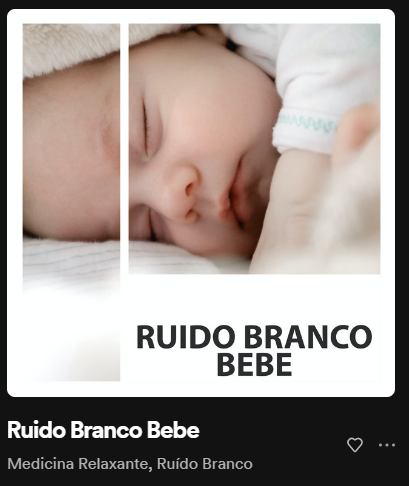

### Músicas mais dançaveis
<p>A capacidade de dança descreve o quão adequada uma música é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral.</p>

In [136]:
df_maisDanca = df_musicas[["nome_da_faixa","nome_do_artista","danceabilidade"]].sort_values(by="danceabilidade",ascending=False)[:5]

df_maisDanca = df_maisDanca.reset_index()[['nome_da_faixa', 'nome_do_artista', 'danceabilidade']]
df_maisDanca = df_maisDanca.drop_duplicates(keep='last')
df_maisDanca

nome_da_faixa  \
0                           Botadinha Saliente   
1                                    Conceited   
2                                      Red Dot   
3  Que Se Foda a Porra Toda (feat. Mc Mr. Bim)   
4                           Dancing in My Room   

                    nome_do_artista  danceabilidade  
0                      MC Rogerinho           0.985  
1                         Flo Milli           0.984  
2  Yunk Vino,Caio Passos,Labbel Rec           0.982  
3                             Dj Tk           0.981  
4                          347aidan           0.980

### Músicas menos dançaveis

In [137]:
df_menosDanca = df_musicas[["nome_da_faixa","nome_do_artista","danceabilidade"]].sort_values(by="danceabilidade",ascending=True)[:5]

df_menosDanca = df_menosDanca.reset_index()[['nome_da_faixa', 'nome_do_artista', 'danceabilidade']]
df_menosDanca = df_menosDanca.drop_duplicates(keep='last')
df_menosDanca

nome_da_faixa     nome_do_artista  danceabilidade
0  Beach Waves and Soothing Brown Noise        Ocean Sounds             0.0
1                          Ruido Branco  Medicina Relaxante             0.0
2                     Ruido Branco Bebe  Medicina Relaxante             0.0
3                               Scalene        Sissy Spacek             0.0
4                      Waiting Too Long     Hippie Sabotage             0.0

### Músicas com mais fala

In [138]:
df_maisFala = df_musicas[["nome_da_faixa","nome_do_artista","fala"]].sort_values(by="fala",ascending=False)[:5]

df_maisFala = df_maisFala.reset_index()[['nome_da_faixa', 'nome_do_artista', 'fala']]
df_maisFala = df_maisFala.drop_duplicates(keep='last')
df_maisFala

nome_da_faixa           nome_do_artista   fala
0          Tá Possuida Cadela          Dj LK da Escócia  0.945
1            Brush Your Teeth                     Raffi  0.934
2                   Nômade IV  Jean Tassy,Yago Oproprio  0.930
3  Pede pra Botar Que Eu Boto        DJ Ws da Igrejinha  0.902
4           De Treta Em Treta                   MC Caja  0.899

### Músicas com menos fala

In [139]:
df_menosFala = df_musicas[["nome_da_faixa","nome_do_artista","fala"]].sort_values(by="fala",ascending=True)[:5]

df_menosFala = df_menosFala.reset_index()[['nome_da_faixa', 'nome_do_artista', 'fala']]
df_menosFala = df_menosFala.drop_duplicates(keep='last')
df_menosFala

nome_da_faixa     nome_do_artista  fala
0                      Waiting Too Long     Hippie Sabotage   0.0
1  Beach Waves and Soothing Brown Noise        Ocean Sounds   0.0
2                               Scalene        Sissy Spacek   0.0
3                          Ruido Branco  Medicina Relaxante   0.0
4                     Ruido Branco Bebe  Medicina Relaxante   0.0

### Músicas com maior acusticidade

In [140]:
df_maisAcusticidade = df_musicas[["nome_da_faixa","nome_do_artista","acusticidade"]].sort_values(by="acusticidade",ascending=False)[:5]

df_maisAcusticidade = df_maisAcusticidade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'acusticidade']]
df_maisAcusticidade = df_maisAcusticidade.drop_duplicates(keep='last')
df_maisAcusticidade

nome_da_faixa       nome_do_artista  \
0  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
1      Brilha Brilha Estrelinha (Piano Instrumental)             Nana Bebê   
2                  Prélude in E minor, Op. 28, No. 4       Frédéric Chopin   
3                                  Clearing the Mind             Nana Bebê   
4                                         I Miss You            Ozymandias   

   acusticidade  
0         0.995  
1         0.995  
2         0.995  
3         0.995  
4         0.995

### Músicas com menor acusticidade

In [141]:
df_menorAcusticidade = df_musicas[["nome_da_faixa","nome_do_artista","acusticidade"]].sort_values(by="acusticidade",ascending=True)[:5]

df_menorAcusticidade = df_menorAcusticidade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'acusticidade']]
df_menorAcusticidade = df_menorAcusticidade.drop_duplicates(keep='last')
df_menorAcusticidade

nome_da_faixa      nome_do_artista  acusticidade
0               Ruido Branco Bebe   Medicina Relaxante      0.000000
1                    Ruido Branco   Medicina Relaxante      0.000000
2  Sex Type Thing - 2017 Remaster  Stone Temple Pilots      0.000001
3                   Mouth for War              Pantera      0.000004
4                            Soft  Motionless In White      0.000005

### Músicas com maior instrumentalidade

In [142]:
df_maiorInstrumentalidade = df_musicas[["nome_da_faixa","nome_do_artista","instrumentalidade"]].sort_values(by="instrumentalidade",ascending=False)[:5]

df_maiorInstrumentalidade = df_maiorInstrumentalidade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'instrumentalidade']]
df_maiorInstrumentalidade = df_maiorInstrumentalidade.drop_duplicates(keep='last')
df_maiorInstrumentalidade

nome_da_faixa  \
0                  Bedtime White Noise Melody   
1                 Hair Dryer [Non-Stationary]   
2  Brahms Lullaby and White Noise Ocean Waves   
3                         Soothing Baby Sleep   
4        528 Hz Bring Positive Transformation   

                                  nome_do_artista  instrumentalidade  
0                               Sleeping Tortoise              0.999  
1                              Medicina Relaxante              0.994  
2                            Baby Lullaby Academy              0.993  
3                               Sleeping Tortoise              0.992  
4  Miracle Tones,Solfeggio Healing Frequencies MT              0.992

### Músicas com menor instrumentalidade

In [143]:
df_menorInstrumentalidade = df_musicas[["nome_da_faixa","nome_do_artista","instrumentalidade"]].sort_values(by="instrumentalidade",ascending=True)[:5]

df_menorInstrumentalidade = df_menorInstrumentalidade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'instrumentalidade']]
df_menorInstrumentalidade = df_menorInstrumentalidade.drop_duplicates(keep='last')
df_menorInstrumentalidade

nome_da_faixa  \
0                                  Don't Forget That   
1  Free Fallin' - Live at the Nokia Theatre, Los ...   
2                                     Singles You Up   
3                                    Ni**as In Paris   
4                                           Aquarela   

                     nome_do_artista  instrumentalidade  
0                             Sha EK                0.0  
1                         John Mayer                0.0  
2                       Jordan Davis                0.0  
3  JAY-Z,Kanye West,Kanye West,JAY-Z                0.0  
4                           Toquinho                0.0

### Músicas com maior indício de ser ao vivo

In [144]:
df_maisAovivo = df_musicas[["nome_da_faixa","nome_do_artista","aovivo"]].sort_values(by="aovivo",ascending=False)[:5]

df_maisAovivo = df_maisAovivo.reset_index()[['nome_da_faixa', 'nome_do_artista', 'aovivo']]
df_maisAovivo = df_maisAovivo.drop_duplicates(keep='last')
df_maisAovivo

nome_da_faixa nome_do_artista  aovivo
0                    Lanterna dos Afogados - Ao Vivo      Maria Gadú   0.993
1  Quando Fui Chuva / Fim de Tarde / Palpite - Ao...        Marvvila   0.990
2                                100 Likes - Ao Vivo            Belo   0.989
3                                Sobrenome - Ao vivo         Vitinho   0.988
4                                       Agora Perdeu       Bom Gosto   0.988

### Músicas com menor indício de ser ao vivo

In [145]:
df_menosAovivo = df_musicas[["nome_da_faixa","nome_do_artista","aovivo"]].sort_values(by="aovivo",ascending=True)[:5]

df_menosAovivo = df_menosAovivo.reset_index()[['nome_da_faixa', 'nome_do_artista', 'aovivo']]
df_menosAovivo = df_menosAovivo.drop_duplicates(keep='last')
df_menosAovivo

nome_da_faixa     nome_do_artista  aovivo
0            Scalene        Sissy Spacek  0.0000
1  Ruido Branco Bebe  Medicina Relaxante  0.0000
2       Ruido Branco  Medicina Relaxante  0.0000
3      Ants Marching  Dave Matthews Band  0.0157
4        Bonetrousle            Toby Fox  0.0200

### Músicas com maior positividade
<p>Faixas com alta positividade soam mais positivas, por exemplo, feliz, alegre, eufórica, enquanto faixas com baixa positividade soam mais negativas, por exemplo, triste, deprimido, zangado.</p>

In [146]:
df_maiorPositividade = df_musicas[["nome_da_faixa","nome_do_artista","positividade"]].sort_values(by="positividade",ascending=False)[:5]

df_maiorPositividade = df_maiorPositividade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'positividade']]
df_maiorPositividade = df_maiorPositividade.drop_duplicates(keep='last')
df_maiorPositividade

nome_da_faixa      nome_do_artista  positividade
0          Spider Dance             Toby Fox         0.993
1  What a Fool Believes  The Doobie Brothers         0.985
2    Sergio el Bailador               Bronco         0.984
3     Mordidinha Safada            Mc Daniel         0.981
4                   Ryd           Steve Lacy         0.980

### Músicas com menor positividade

In [147]:
df_menorPositividade = df_musicas[["nome_da_faixa","nome_do_artista","positividade"]].sort_values(by="positividade",ascending=True)[:5]

df_menorPositividade = df_menorPositividade.reset_index()[['nome_da_faixa', 'nome_do_artista', 'positividade']]
df_menorPositividade = df_menorPositividade.drop_duplicates(keep='last')
df_menorPositividade

nome_da_faixa     nome_do_artista  positividade
0         Waiting Too Long     Hippie Sabotage           0.0
1        Ruido Branco Bebe  Medicina Relaxante           0.0
2             Ruido Branco  Medicina Relaxante           0.0
3  Gentle Piano Baby Sleep   Sleeping Tortoise           0.0
4        Clearing the Mind           Nana Bebê           0.0

### Músicas com maior tempo
<p>O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.</p>

In [148]:
df_maiorTempo = df_musicas[["nome_da_faixa","nome_do_artista","tempo"]].sort_values(by="tempo",ascending=False)[:5]

df_maiorTempo = df_maiorTempo.reset_index()[['nome_da_faixa', 'nome_do_artista', 'tempo']]
df_maiorTempo = df_maiorTempo.drop_duplicates(keep='last')
df_maiorTempo

nome_da_faixa nome_do_artista    tempo
0                          Mama Cry       YNW Melly  220.099
1                    Queimando Tudo     Planet Hemp  215.126
2  Soli (feat. Tiago PZK & Rvssian)         Rvssian  214.047
3                snowfall (Sped Up)        Øneheart  213.503
4              Pull up to Mi Bumper        Konshens  211.958

### Músicas com menor tempo

In [149]:
df_menorTempo = df_musicas[["nome_da_faixa","nome_do_artista","tempo"]].sort_values(by="tempo",ascending=True)[:5]

df_menorTempo = df_menorTempo.reset_index()[['nome_da_faixa', 'nome_do_artista', 'tempo']]
df_menorTempo = df_menorTempo.drop_duplicates(keep='last')
df_menorTempo

nome_da_faixa     nome_do_artista  tempo
0                               Scalene        Sissy Spacek    0.0
1                      Waiting Too Long     Hippie Sabotage    0.0
2                     Ruido Branco Bebe  Medicina Relaxante    0.0
3                          Ruido Branco  Medicina Relaxante    0.0
4  Beach Waves and Soothing Brown Noise        Ocean Sounds    0.0

## Correlação dos dados

Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

In [150]:
df_corr = df_musicas.corr(method="pearson")

df_corr

C:\Users\davit\AppData\Local\Temp\ipykernel_11312\1375236007.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



popularidade  duracao_ms  explicita  danceabilidade  \
popularidade           1.000000    0.005504  -0.013079       -0.007017   
duracao_ms             0.005504    1.000000  -0.101161       -0.209810   
explicita             -0.013079   -0.101161   1.000000        0.322957   
danceabilidade        -0.007017   -0.209810   0.322957        1.000000   
energia                0.055482   -0.012467  -0.005452        0.053877   
tonalidade            -0.013382   -0.016652  -0.001458        0.019448   
volume                 0.077712   -0.027988   0.126554        0.235164   
modalidade             0.010890    0.032800  -0.121407       -0.122874   
fala                  -0.094078   -0.087626   0.470458        0.276126   
acusticidade          -0.152582   -0.030626  -0.130529       -0.131306   
instrumentalidade     -0.093749   -0.039895  -0.089122       -0.159054   
aovivo                -0.070366    0.021670  -0.100774       -0.177350   
positividade          -0.034625   -0.143576  -0.028233        0.387088   
tempo                 -0.002141   -0.006743  -0.009798       -0.069671   
assinatura_tempo      -0.030535   -0.008393   0.087348        0.157985   

                    energia  tonalidade    volume  modalidade      fala  \
popularidade       0.055482   -0.013382  0.077712    0.010890 -0.094078   
duracao_ms        -0.012467   -0.016652 -0.027988    0.032800 -0.087626   
explicita         -0.005452   -0.001458  0.126554   -0.121407  0.470458   
danceabilidade     0.053877    0.019448  0.235164   -0.122874  0.276126   
energia            1.000000    0.029912  0.674005   -0.048113 -0.018252   
tonalidade         0.029912    1.000000  0.015622   -0.114244  0.015829   
volume             0.674005    0.015622  1.000000   -0.053288  0.069149   
modalidade        -0.048113   -0.114244 -0.053288    1.000000 -0.128375   
fala              -0.018252    0.015829  0.069149   -0.128375  1.000000   
acusticidade      -0.517556   -0.010450 -0.388169    0.050541 -0.035158   
instrumentalidade -0.142405    0.002097 -0.403185    0.010894 -0.100517   
aovivo             0.212224   -0.005460  0.063333    0.045338 -0.067629   
positividade       0.320802    0.038804  0.263773   -0.043377  0.076480   
tempo              0.160388    0.005002  0.117830    0.015783  0.012061   
assinatura_tempo   0.110122    0.001037  0.112116   -0.039721  0.127302   

                   acusticidade  instrumentalidade    aovivo  positividade  \
popularidade          -0.152582          -0.093749 -0.070366     -0.034625   
duracao_ms            -0.030626          -0.039895  0.021670     -0.143576   
explicita             -0.130529          -0.089122 -0.100774     -0.028233   
danceabilidade        -0.131306          -0.159054 -0.177350      0.387088   
energia               -0.517556          -0.142405  0.212224      0.320802   
tonalidade            -0.010450           0.002097 -0.005460      0.038804   
volume                -0.388169          -0.403185  0.063333      0.263773   
modalidade             0.050541           0.010894  0.045338     -0.043377   
fala                  -0.035158          -0.100517 -0.067629      0.076480   
acusticidade           1.000000           0.122113  0.036965     -0.039221   
instrumentalidade      0.122113           1.000000 -0.037351     -0.153115   
aovivo                 0.036965          -0.037351  1.000000      0.034684   
positividade          -0.039221          -0.153115  0.034684      1.000000   
tempo                 -0.086752          -0.047948  0.035511      0.084481   
assinatura_tempo      -0.094669          -0.050314 -0.000799      0.098527   

                      tempo  assinatura_tempo  
popularidade      -0.002141         -0.030535  
duracao_ms        -0.006743         -0.008393  
explicita         -0.009798          0.087348  
danceabilidade    -0.069671          0.157985  
energia            0.160388          0.110122  
tonalidade         0.005002          0.001037  
volume             0.117830          0.112116  


In [151]:
# Criação do gráfico de heatmap
fig = go.Figure(data=go.Heatmap(
                   z=df_corr.values,
                   x=df_corr.columns,
                   y=df_corr.index,
                   colorscale='Greens',
                   colorbar=dict(title='Correlação'),
                   text=df_corr.values,  # Adiciona os valores numéricos
                   hovertemplate='Valor: %{text:.1f}'  # Formatação do tooltip
))

# Configurações de layout do gráfico
fig.update_layout(
    title='Correlação entre as variáveis',
    xaxis=dict(title='Variáveis'),
    yaxis=dict(title='Variáveis'),
    width=800,
    height=700
)

# Exibição do gráfico
fig.show()

#### Correlação entre acusticidade e energia

Primeiro extraímos os valores de x e y do DataFrame df_musicas. Em seguida, usamos a função np.polyfit() para calcular os coeficientes da linha linear que melhor se ajustam aos pontos de dados. Em seguida, criamos uma função de linha usando np.poly1d(). Por fim, usamos plt.plot() para traçar a linha usando os valores de x e a função de linha.

In [152]:
# Plotando o gráfico de dispersão
fig = px.scatter(df_musicas, x='acusticidade', y='energia', trendline='ols', trendline_color_override="red")

# Personalizando o gráfico
fig.update_traces(marker=dict(color='#1DB954'))

# Exibindo o gráfico
fig.show()

#### Correlação entre energia e volume

In [153]:
# Plotando o gráfico de dispersão
fig = px.scatter(df_musicas, x='volume', y='energia', trendline='ols', trendline_color_override="red")

# Personalizando o gráfico
fig.update_traces(marker=dict(color='#1DB954'))

# Exibindo o gráfico
fig.show()

# Dataframe dos Usuários

In [154]:
df_usuarios.head()

id_da_faixa    nome_da_faixa  nome_do_artista  \
0  7wdwIaXUuzlu1grzWMFRJm  Mary On A Cross            Ghost   
1  6I3mqTwhRpn34SLVafSH7G            Ghost    Justin Bieber   
2  1daDRI9ahBonbWD8YcxOIB  Angels Like You      Miley Cyrus   
3  6jugu0rJWQUxwP6YekuYh7      Miley Cyrus  Ying Yang Twins   
4  66tHO11PSLP7u25A6XM4iR       Love, Love   Cedarmont Kids   

                                  generos_do_artista  \
0                             ['hard rock', 'metal']   
1                            ['canadian pop', 'pop']   
2                                            ['pop']   
3  ['atl hip hop', 'crunk', 'dirty south rap', 'o...   
4                                            ['vbs']   

               nome_do_album           id_do_artista  popularidade  \
0  [MESSAGE FROM THE CLERGY]  1Qp56T7n950O3EGMsSl81D            77   
1                    Justice  1uNFoZAHBGtllmzznpCI3s            89   
2             Plastic Hearts  5YGY8feqx7naU7z4HrwZM6            94   
3              Twerking Hitz  44PA0rCQXikgOWbfY7Fq7m             0   
4            Songs Of Praise  0MCU2OpgnSB7rm5UPUMHgt             8   

   duracao_ms  explicita  danceabilidade  ...  modalidade    fala  \
0      244804      False           0.467  ...           1  0.0451   
1      153190      False           0.601  ...           1  0.0478   
2      196453      False           0.672  ...           1  0.0313   
3      216659      False           0.762  ...           0  0.0781   
4      142960      False           0.577  ...           0  0.0310   

   acusticidade  instrumentalidade  aovivo  positividade    tempo  \
0      0.000187           0.000493  0.1050         0.554  130.027   
1      0.185000           0.000029  0.4150         0.441  153.960   
2      0.098100           0.000000  0.1000         0.494  121.981   
3      0.007310           0.000182  0.2180         0.402   98.060   
4      0.898000           0.000000  0.0794         0.491  129.640   

   assinatura_tempo                                          album_img  \
0                 4  https://i.scdn.co/image/ab67616d00001e02f7dbc5...   
1                 4  https://i.scdn.co/image/ab67616d00001e02e6f407...   
2                 4  https://i.scdn.co/image/ab67616d00001e028cffb7...   
3                 4  https://i.scdn.co/image/ab67616d00001e02682ec1...   
4                 4  https://i.scdn.co/image/ab67616d00001e0221fd70...   

   usuário  
0     Anne  
1     Anne  
2     Anne  
3     Anne  
4     Anne  

[5 rows x 23 columns]

## Primeiras análises

### Músicas que mais se repetiram

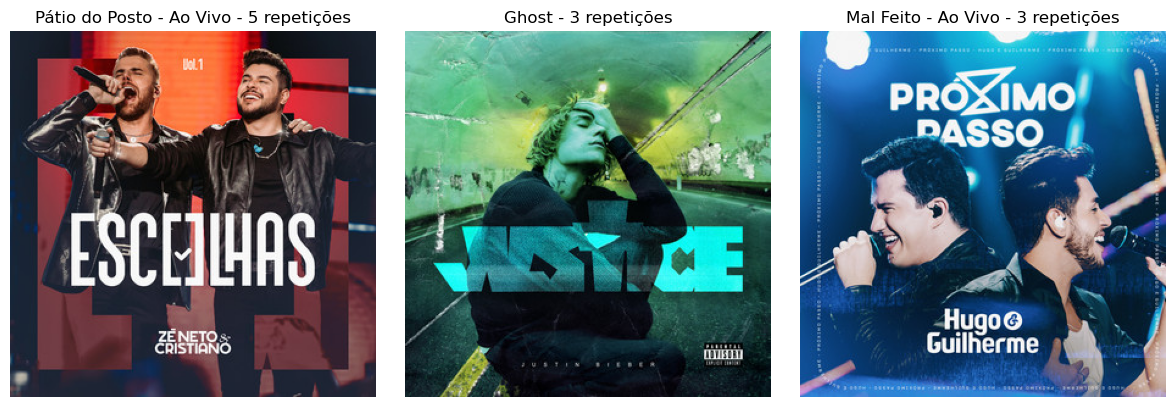

In [155]:
df_musicas_repetidas = df_usuarios[['id_da_faixa','nome_da_faixa', 'nome_do_artista','album_img']].value_counts()
df_musicas_repetidas = pd.DataFrame(df_musicas_repetidas.head(3).reset_index())
df_musicas_repetidas.rename(columns={0: 'n_musicas'}, inplace=True)

# Criar a figura e as subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Percorrer o dataframe e exibir as imagens com o número de repetições
for i, (index, row) in enumerate(df_musicas_repetidas.iterrows()):
    response = requests.get(row['album_img'])
    imagem = Image.open(BytesIO(response.content))
    
    
    # Exibir a imagem redimensionada com o número de repetições na subplot atual
    axs[i].imshow(imagem)
    axs[i].set_title(f'{row["nome_da_faixa"]} - {row["n_musicas"]} repetições')
    axs[i].axis('off')

# Ajustar o espaçamento entre as subplots
plt.tight_layout()

# Mostrar todas as imagens
plt.show()

### Gêneros mais escutados

In [156]:
#Copiando o dataframe
df_generos_usuarios = df_usuarios.copy()

#Separando os Gêneros
df_generos_usuarios['generos'] = df_generos_usuarios['generos_do_artista'].str.strip('[]').str.split(',')

#Criando linhas indivíduais para cada gênero
df_generos_usuarios_separado = df_generos_usuarios.explode('generos')

# Filtrando gêneros não classificados
df_generos_usuarios_separado = df_generos_usuarios_separado[df_generos_usuarios_separado['generos'] != '']

In [157]:
#Contando a aparição dos gêneros
df_generos_usuarios_separado['generos'] = df_generos_usuarios_separado['generos'].str.replace("'", "").str.lstrip()

top_generos_count = df_generos_usuarios_separado['generos'].value_counts()

top_generos_count

pop                        94
sertanejo universitario    81
arrocha                    69
agronejo                   67
sertanejo                  54
                           ..
cante flamenco              1
flamenco                    1
rumba                       1
funk melody                 1
dark r&b                    1
Name: generos, Length: 380, dtype: int64

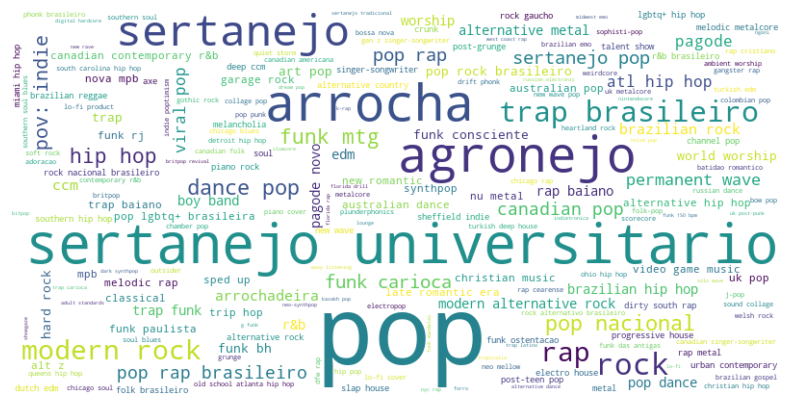

In [158]:
from wordcloud import WordCloud
# Definindo a frequência dos generos
frequencia_generos = top_generos_count

# Criando o dicionário de frequências
frequencias = frequencia_generos.to_dict()

# Definindo a cor de fundo
cor_fundo = 'white' 

# Definindo o fator de escala relativo, valor menor que 1 para tornar as palavras mais frequentes mais escuras
fator_escala_relativo = 0.6

# Criando o Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color=cor_fundo, collocations=False, relative_scaling=fator_escala_relativo).generate_from_frequencies(frequencias)

# Plotando o Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Análise dos Usuários

### Média das músicas dos usuários
Pegamos apenas os valores numéricos e fizemos uma média de todos os usuários com nome igual 
para ter apenas uma linha de cada usuário com os dados sendo uma média das músicas executadas por ele, 
gerando um status exclusivo para cada um.

Transformamos a coluna explicita de booleana (true ou false) para (1 ou 0)

In [159]:
df_usuarios['explicita'] = df_usuarios['explicita'].map({True: 1, False: 0})

Para fazer a média dos valores das músicas dos usuários, tiramos tudo que não for numérico, como nome da faixa, nome do artista, etc.

In [160]:
# Selecionar apenas as colunas relevantes
columns = ['popularidade', 'duracao_ms', 'explicita', 'danceabilidade', 'energia', 'tonalidade', 'volume',
           'modalidade', 'fala', 'acusticidade', 'instrumentalidade', 'aovivo',
           'positividade', 'tempo', 'assinatura_tempo', 'usuário']
df_relevantes = df_usuarios[columns]

Apenas os valores numéricos

In [161]:
df_relevantes.head(3)

popularidade  duracao_ms  explicita  danceabilidade  energia  tonalidade  \
0            77      244804          0           0.467    0.900          11   
1            89      153190          0           0.601    0.741           2   
2            94      196453          0           0.672    0.642           5   

   volume  modalidade    fala  acusticidade  instrumentalidade  aovivo  \
0  -4.505           1  0.0451      0.000187           0.000493   0.105   
1  -5.569           1  0.0478      0.185000           0.000029   0.415   
2  -4.035           1  0.0313      0.098100           0.000000   0.100   

   positividade    tempo  assinatura_tempo usuário  
0         0.554  130.027                 4    Anne  
1         0.441  153.960                 4    Anne  
2         0.494  121.981                 4    Anne

Agrupando por usuário e realizando a média

In [162]:
# Calcular a média das colunas para cada usuário
df_usuarios_media = df_relevantes.groupby('usuário').mean()

#### Agora temos os usuários e suas médias de gostos

In [163]:
df_usuarios_media.head(28)

popularidade     duracao_ms  explicita  danceabilidade  \
usuário                                                                
Anne             49.750000  203348.400000   0.050000        0.630050   
Antonio          42.350000  207537.050000   0.150000        0.516600   
Armando          38.150000  219017.450000   0.100000        0.510450   
Caio             68.100000  205224.750000   0.150000        0.686350   
CaioV            38.950000  226138.300000   0.250000        0.543250   
Catarine         54.100000  217048.550000   0.050000        0.606250   
Celio            77.300000  186325.400000   0.400000        0.729750   
Davi             66.250000  198558.450000   0.200000        0.586800   
Enrico            7.133333  274415.466667   0.000000        0.463533   
Fellipe          65.650000  199446.400000   0.100000        0.583300   
Gabi             71.100000  182932.500000   0.100000        0.669500   
GabrielSpada     69.400000  227292.700000   0.250000        0.619900   
Julia            42.950000  211248.200000   0.200000        0.642950   
Laura            49.900000  208005.650000   0.250000        0.561800   
Lilian           70.250000  174846.450000   0.250000        0.624650   
Lucas            70.250000  174846.450000   0.250000        0.624650   
Luisa            59.450000  212795.900000   0.300000        0.602950   
Marcelo          54.150000  225003.700000   0.200000        0.568600   
MariaEduarda     53.600000  158358.000000   0.400000        0.656400   
Mateus           68.100000  212137.750000   0.000000        0.590650   
MateusCastro     64.750000  197169.400000   0.250000        0.631450   
Pedro            72.050000  431520.900000   0.200000        0.585200   
PedroDonatte     51.700000  216774.250000   0.100000        0.549150   
Rayan            47.400000  214536.600000   0.050000        0.613550   
Rayra            37.850000  218225.900000   0.000000        0.596750   
Rodrigo          61.352941  191211.117647   0.058824        0.595059   
ThiagoL          49.400000  216612.700000   0.100000        0.646250   
VitorSolla       68.900000  192244.250000   0.250000        0.640550   

               energia  tonalidade     volume  modalidade      fala  \
usuário                                                               
Anne          0.646750        4.30  -7.615950    0.750000  0.059850   
Antonio       0.662200        6.15  -7.324600    0.600000  0.063170   
Armando       0.672950        4.40  -7.989050    0.600000  0.101450   
Caio          0.688700        4.95  -6.425150    0.500000  0.151845   
CaioV         0.606850        5.50  -7.454100    0.700000  0.086305   
Catarine      0.693500        6.10  -6.678300    0.500000  0.086210   
Celio         0.740950        5.80  -4.462150    0.650000  0.106195   
Davi          0.615700        3.90  -7.647800    0.450000  0.058575   
Enrico        0.315773        4.60 -16.946333    0.733333  0.064327   
Fellipe       0.770500        5.65  -5.819300    0.550000  0.108115   
Gabi          0.752250        5.70  -5.631100    0.800000  0.062055   
GabrielSpada  0.676600        5.65  -6.912500    0.600000  0.116265   
Julia         0.642000        5.25  -6.753900    0.500000  0.100945   
Laura         0.613135        4.10  -8.057850    0.700000  0.069305   
Lilian        0.668400        5.15  -5.697900    0.550000  0.147705   
Lucas         0.668400        5.15  -5.697900    0.550000  0.147705   
Luisa         0.613850        6.30  -8.105700    0.600000  0.103530   
Marcelo       0.640450        4.50  -7.372650    0.500000  0.082330   
MariaEduarda  0.762650        6.55  -6.800950    0.250000  0.102500   
Mateus        0.751250        5.65  -5.134500    0.500000  0.079400   
MateusCastro  0.681850        5.75  -6.802050    0.450000  0.076575   
Pedro         0.704000        6.50  -5.699100    0.550000  0.076010   
PedroDonatte  0.662750        4.10  -7.652650    0.600000  0.089665   
Rayan         0.609300        6.45  -7.800600    0.650000  0.093090   
Rayra  

#### Com os dados de cada usuário podemos partir para algumas análises

### Análise do Grupo de usuários

#### Popularidade

A coluna popularidade é um valor entre 0 e 100 de uma música, sendo 100 o mais popular.
A partir da média da popularidade das músicas ouvidas pelo usuário, 
temos um valor do quanto cada usuário segue a tendência.<br>
<br>
Plot da coluna popularidade do Data Frame de usuários ordenados de forma decrescente

In [164]:
mais_padrao = df_usuarios_media.groupby('usuário')['popularidade'].mean().nlargest(28)

fig = go.Figure(data=go.Bar(x=mais_padrao.index, y=mais_padrao.values, marker_color='#1DB954'))

fig.update_layout(
    title='Usuário mais padrão',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Popularidade'),
    height=500,
    width=900
)

fig.show()

Podemos ver que Célio, Pedro e Gabi escutam por sua maioria músicas consideradas populares pelo Spotify enquanto Enrico por escutar apenas músicas clássicas tem um valor bem baixo<br>
<br>
Como funciona a popularidade?

A popularidade é calculada por algoritmo e é baseada, na maioria, no número total de reproduções que a faixa teve e quão recentes são essas reproduções.
De modo geral, as músicas que estão sendo muito tocadas agora terão uma popularidade maior do que as músicas que eram muito tocadas no passado.


#### Positividade

A coluna positividade é uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta positividade soam mais positivas (feliz, alegre, eufórica), enquanto faixas com baixa positividade soam mais negativas (triste, deprimido, zangado).
<br><br>
Plot da coluna positividade do data frame de usuários ordenado de forma decrescente

In [165]:
mais_positivo = df_usuarios_media.groupby('usuário')['positividade'].mean().nlargest(28)

fig = go.Figure(data=go.Bar(x=mais_positivo.index, y=mais_positivo.values, marker_color='#1DB954'))

fig.update_layout(
    title='Usuário mais positivo',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Positividade das musicas'),
    height=500,
    width=800
)

fig.show()

Podemos ver a popularidade da música não depende dela ser positiva visto que agora, Pedro e Célio estão distantes no gráfico.

#### Instrumentalidade

A coluna instrumentalidade prevê se uma faixa não contém vocais.
Quanto mais próximo o valor da instrumentalidade estiver de 1,0, 
maior a probabilidade da faixa não conter nenhum conteúdo vocal. 
<br><br>
Plot da coluna instrumentalidade do Data Frame de usuários ordenados de forma decrescente

In [166]:
mais_instrumental = df_usuarios_media.groupby('usuário')['instrumentalidade'].mean().nlargest(28)

fig = go.Figure(data=go.Bar(x=mais_instrumental.index, y=mais_instrumental.values, marker_color='#1DB954'))

fig.update_layout(
    title='Usuário mais instrumental',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Instrumentalidade das musicas'),
    height=500,
    width=800
)

fig.show()

Podemos ver que Enrico por escutar apenas músicas clássicas tem um valor superior nessa análise. 

#### Expliciticidade

Se a música possui ou não conteúdo explícito (1 ou 0)<br>
<br>
Plot da coluna explicita do Data Frame de usuários ordenados de forma decrescente

In [167]:
mais_explicito = df_usuarios_media.groupby('usuário')['explicita'].mean().nlargest(28)

fig = go.Figure(data=go.Bar(x=mais_explicito.index, y=mais_explicito.values, marker_color='#1DB954'))

fig.update_layout(
    title='Usuário com musicas mais explicitas',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Musicas mais explicitas'),
    height=500,
    width=800
)

fig.show()

Podemos ver que Maria Eduarda e Célio escutam bastante músicas com conteúdo explícito

#### Frequência de Fala

Detecta a presença de falas em uma faixa. 
Quanto mais frequente for à fala mais próximo de 1,0 será o valor do atributo.<br>
<br>
Plot da coluna fala do data frame de usuários ordenado de forma decrescente

In [168]:
mais_fala = df_usuarios_media.groupby('usuário')['fala'].mean().nlargest(28)

fig = go.Figure(data=go.Bar(x=mais_fala.index, y=mais_fala.values, marker_color='#1DB954'))

fig.update_layout(
    title='Escuta musicas com mais falas',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Musicas com mais falas'),
    height=500,
    width=800
)

fig.show()

Podemos ver que Caio e Lilian escutam mais músicas com alta frequência de fala, como poesia, rap e afins.

#### Danceabilidade

Um valor de 0,0 a 1,0 sendo 1,0 o mais dançável.


Plot da coluna Danceabilidade do data frame de usuários ordenado de forma decrescente

In [169]:
mais_dançável = df_usuarios_media.groupby('usuário')['danceabilidade'].mean().nlargest(50)

fig = go.Figure(data=go.Bar(x=mais_dançável.index, y=mais_dançável.values, marker_color='#1DB954'))

fig.update_layout(
    title='Escuta músicas mais dançáveis',
    xaxis=dict(title='Usuários', tickangle=90),
    yaxis=dict(title='Musicas mais dançáveis'),
    height=500,
    width=800
)

fig.show()

Podemos ver que Celio e Caio e Gabi escutam por sua maioria, musicas mais dançáveis

### Encontrando grupos parecidos com KMeans

Divisão dos usuários em grupos que tenham os valores próximos nas colunas

Biblioteca necessária 

In [170]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Para essa análise desconsideramos o tempo das músicas

In [171]:
# Selecionar apenas as colunas relevantes
columns = ['popularidade', 'explicita', 'modalidade', 'fala', 'danceabilidade', 'energia', 'tonalidade', 'volume',
           'acusticidade', 'instrumentalidade', 'aovivo', 'positividade']
df = df_usuarios_media[columns]

In [172]:
df.head(3)

popularidade  explicita  modalidade     fala  danceabilidade  \
usuário                                                                 
Anne            49.75       0.05        0.75  0.05985         0.63005   
Antonio         42.35       0.15        0.60  0.06317         0.51660   
Armando         38.15       0.10        0.60  0.10145         0.51045   

         energia  tonalidade   volume  acusticidade  instrumentalidade  \
usuário                                                                  
Anne     0.64675        4.30 -7.61595      0.355385           0.057185   
Antonio  0.66220        6.15 -7.32460      0.244122           0.139657   
Armando  0.67295        4.40 -7.98905      0.302018           0.126816   

           aovivo  positividade  
usuário                          
Anne     0.208040      0.495950  
Antonio  0.216475      0.565000  
Armando  0.190335      0.474285

Normalizamos dos dados selecionados utilizando a média e o desvio padrão

In [173]:
df_normalized = (df - df.mean()) / df.std()

Dados normalizados

In [174]:
df_normalized.head(3)

popularidade  explicita  modalidade      fala  danceabilidade  \
usuário                                                                  
Anne        -0.417573  -1.039770    1.492975 -1.294001        0.489572   
Antonio     -0.905604  -0.146394    0.166849 -1.166149       -1.543184   
Armando     -1.182594  -0.593082    0.166849  0.307999       -1.653377   

          energia  tonalidade    volume  acusticidade  instrumentalidade  \
usuário                                                                    
Anne    -0.283171   -1.269359 -0.278533      0.356996          -0.254758   
Antonio -0.104234    0.963334 -0.145774     -0.417321           0.481104   
Armando  0.020268   -1.148673 -0.448543     -0.014399           0.366535   

           aovivo  positividade  
usuário                          
Anne    -0.442757     -0.132927  
Antonio -0.365459      0.705817  
Armando -0.605003     -0.396090

#### Definindo o número de Cluster

Para definir a quantidade de grupos (clusters) utilizamos o Método do Cotovelo, onde rodamos o KMeans para várias quantidades de cluster e analisamos as suas distorções.

In [175]:
k_values = list(range(1, 10))

inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=k_values, y=inertias, mode='lines+markers'))
fig.update_layout(
    title='KMeans Método do Cotovelo',
    xaxis_title='Número de Clusters (K)',
    yaxis_title='Distorção',
    showlegend=False
)
fig.show()

Definimos a quantidade ideal de clusters ao encontrar ponto de cotovelo, onde existe uma grande variação de distorção prévia que se reduz posteriormente.<br>
Podemos ver que a variação do 2 para o 3 é maior que a do 3 para o  4, formado assim o cotovelo, logo o número de clusters ideal é 3  


#### KMeans
Definimos o número de grupos desejados (3) e criamos o objeto KMeans

In [176]:
algoritmo = KMeans(n_clusters=3)

Aplicamos o algoritmo K-means aos dados normalizados

In [177]:
algoritmo.fit(df_normalized)

c:\Users\davit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

Resultados armazenados no objeto 'algoritmo'

In [178]:
#atribuimos 'labels' ao acesso dos rótulos atribuídos a cada ponto
labels = algoritmo.labels_

Criamos um dicionário vazio para armazenar os grupos.

Importante definir o range para o mesmo valor da quantidade de grupos do Kmeans

In [179]:
groups = {}
for i in range(3):
    groups[i] = []

Atribuimos de cada rótulo(nomes) ao seu respectivo grupo no dicionário

In [180]:
# Atribuir cada rótulo ao seu respectivo grupo
for i, label in enumerate(labels):
    groups[label].append(df_usuarios_media.index[i])

Imprimimos os usuários de cada grupo

In [181]:
# Imprimir os usuários de cada grupo
for group, users in groups.items():
    print(f"Grupo {group + 1}:")
    for user in users:
        print(user)
    print()

Grupo 1:
Anne
Antonio
Armando
CaioV
Catarine
Davi
Julia
Laura
Marcelo
MariaEduarda
MateusCastro
Pedro
PedroDonatte
Rayan
Rayra

Grupo 2:
Caio
Celio
Fellipe
Gabi
GabrielSpada
Lilian
Lucas
Luisa
Mateus
Rodrigo
ThiagoL
VitorSolla

Grupo 3:
Enrico



In [182]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=df_normalized['popularidade'],
        y=df_normalized['positividade'],
        z=df_normalized['energia'],
        mode='markers',
        marker=dict(
            size=5,
            #Cores dos grupos separados pelo Kmeans
            color=labels,
            colorscale='Viridis',
            opacity=0.8
        ),
        hovertext=['Grupo ' + str(label + 1) for label in labels]
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='Popularidade',
        yaxis_title='Positividade',
        zaxis_title='Energia'
    ),
    title='Grupos do K-means'
)

fig.show()

Podemos ver que até na divisão dos usuários em grupos, Enrico permanece sozinho devido ao fato ser o único a escutar apenas músicas clássicas no spotify e assim possuir dados divergentes dos demais.

## Recomendação de Músicas

### Normalizando os dados

In [183]:
# Criando método para normalizar colunas

def normalize_column(col):
    max_d = df_musicas[col].max()
    min_d = df_musicas[col].min()
    df_musicas[col] = (df_musicas[col] - min_d)/(max_d - min_d)

In [184]:
#Selecionando apenas as colunas a serem normalizadas

num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df_musicas.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [185]:
df_musicas.head(2)

id_da_faixa                    nome_da_faixa  \
0  000xYdQfIZ4pDmBGzQalKU            Eu, Você, O Mar e Ela   
1  001UkMQHw4zXfFNdKpwXAF  Brand New Man - with Luke Combs   

             nome_do_artista  \
0  Luan Santana,Luan Santana   
1              Brooks & Dunn   

                                  generos_do_artista nome_do_album  \
0  ['arrocha', 'sertanejo', 'sertanejo universita...          1977   
1  ['contemporary country', 'country', 'country r...        Reboot   

                                   id_do_artista  popularidade  duracao_ms  \
0  3qvcCP2J0fWi0m0uQDUf6r,3qvcCP2J0fWi0m0uQDUf6r          0.66    0.035928   
1                         0XKOBt59crntr7HQXXO8Yz          0.72    0.036713   

   explicita  danceabilidade  ...    volume  modalidade      fala  \
0      False        0.516751  ...  0.747837         1.0  0.042328   
1      False        0.581726  ...  0.785696         1.0  0.036402   

   acusticidade  instrumentalidade    aovivo  positividade     tempo  \
0      0.687437           0.000540  0.466264      0.655589  0.754288   
1      0.003739           0.000079  0.292044      0.565962  0.577290   

   assinatura_tempo  duracao_min  
0               0.8     00:03:07  
1               0.8     00:03:11  

[2 rows x 22 columns]

In [186]:
# from sklearn.cluster import KMeans

# km = KMeans(n_clusters=10)
# cat = km.fit_predict(num)
# df_musicas['cat'] = cat
# normalize_column('cat')

In [187]:
# df_musicas.cat[:10]

### Classe de Recomendação

In [188]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        # Indicando a classe a qual dados utilizar
        self.rec_data_ = rec_data
    
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    # Função de recomendação
    def get_recommendations(self, song_id, amount=1):
        # Lista para armazenar as distâncias
        distances = []
        # Seleciona os dados da música de referência com base no song_id fornecido. Essa música é armazenada na variável song.
        song = self.rec_data_[(self.rec_data_.id_da_faixa.str.lower() == song_id.lower())].head(1).values[0]
        # Conjunto de dados res_data, que exclui a música de referência dos dados originais.
        res_data = self.rec_data_[self.rec_data_.id_da_faixa.str.lower() != song_id.lower()]
        
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                # Selecionando apenas as colunas numericas
                if not col in [0,1,2,3,4,5,6,8,21]:
                    # Calculando a distancia de manhattan para cada coluna. A distância é calculada somando as diferenças absolutas entre os valores numéricos das colunas relevantes
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)

        res_data = res_data.assign(distance=distances)

        # Filtrando em ordem crescente
        res_data = res_data.sort_values('distance')
        
        colunas = ['nome_do_artista', 'nome_da_faixa', 'distance']
        return res_data[colunas][:amount]

Criando o objeto recommender

In [189]:
recommender = SpotifyRecommender(df_musicas)

Testando a função

In [208]:
display(df_musicas.loc[df_musicas ['id_da_faixa'] == '7wdwIaXUuzlu1grzWMFRJm'])
recommender.get_recommendations('7wdwIaXUuzlu1grzWMFRJm',10)

id_da_faixa    nome_da_faixa nome_do_artista  \
12277  7wdwIaXUuzlu1grzWMFRJm  Mary On A Cross           Ghost   

           generos_do_artista              nome_do_album  \
12277  ['hard rock', 'metal']  [MESSAGE FROM THE CLERGY]   

                id_do_artista  popularidade  duracao_ms  explicita  \
12277  1Qp56T7n950O3EGMsSl81D          0.77    0.047436      False   

       danceabilidade  ...    volume  modalidade      fala  acusticidade  \
12277        0.474112  ...  0.792977         1.0  0.047725      0.000188   

       instrumentalidade   aovivo  positividade     tempo  assinatura_tempo  \
12277           0.000493  0.10574      0.557905  0.590766               0.8   

       duracao_min  
12277     00:04:04  

[1 rows x 22 columns]

  0%|          | 0/12373 [00:00<?, ?it/s]

100%|██████████| 12373/12373 [00:00<00:00, 33332.51it/s]


nome_do_artista             nome_da_faixa  distance
8099                   Ghost          Kiss The Go-Goat  0.224128
10312            Chris Young              Think of You  0.292437
9413           Local Natives  When Am I Gonna Lose You  0.293804
78                Luke Bryan             Play It Again  0.333245
10257       Bowling For Soup                    Almost  0.336174
3868               Metallica        Whiskey In The Jar  0.339384
5669               Metallica        Whiskey In The Jar  0.360622
7677             Def Leppard                    Animal  0.364321
4117   Red Hot Chili Peppers             Snow (Hey Oh)  0.371938
9867                Deftones                   7 Words  0.377120

Criando a playlist de um usuário

In [209]:
df_usuario_base = df_usuarios.loc[df_usuarios['usuário']=='Mateus']

df_usuario_base[["id_da_faixa","nome_do_artista","nome_da_faixa"]]

id_da_faixa         nome_do_artista  \
0   6C1zL1nBK9fVF40mD9fvNd     Fazendinha Sessions   
1   2kBxNuYFT0J8w9CD4ugLpJ       Marcos & Fernando   
2   0MKd4uZd8Ag8qyReZBTarP             Murilo Huff   
3   40fRA3sONEHzt20oKvyhRA          Mari Fernandez   
4   4ASA1PZyWGbuc4d9N8OAcF           Gustavo Mioto   
5   42nZBOwXNdO24Ml032bLBS         Matheus & Kauan   
6   6Zw25LRLP0j0MsezDFIUM4        Hugo & Guilherme   
7   2YFFjN9eu6yUAeLr2QJBE8  Juan Marcus & Vinícius   
8   1VcGx47V3mlyZeM7ylY0fh                  Loubet   
9   2S1FdpJKYFei9B9y81TTFG    Matogrosso & Mathias   
10  17vkpwdNFLE5T1Y4PE3stJ             Ana Castela   
11  5yHC5TI4GAuKaeNYgCpLju            Bethel Music   
12  0KXdSF0Poa57KOepZ3hKrh          Naiara Azevedo   
13  3C99BfGe301JNp7BqTX5Uu        Felipe e Rodrigo   
14  3yHXEidSu4gYVRqKoI653O      Guilherme & Benuto   
15  5TGkZGCUoV1zvFxQOIQM5O                HITMAKER   
16  4pzRxLzkLjnqnrOL0VMV5w          Wesley Safadão   
17  07VBqWH6NG8L2ad3l84UKk       The Neighbourhood   
18  7nwHsYxiuHo98dLI7UVkyn        Maiara & Maraisa   
19  7LUZT12r4xmwR1Kh8TJgjv           Gusttavo Lima   

                                        nome_da_faixa  
0          Fazendinha Sessions #2: Vai Ser Bão Pra lá  
1                             Trocaria Tudo - Ao Vivo  
2              Pino da Granada (Ao Vivo em Rio Preto)  
3                            Só de Imaginar - Ao Vivo  
4                            Eu Gosto Assim - Ao Vivo  
5                                   Gatilho - Ao Vivo  
6                                 Mal Feito - Ao Vivo  
7   Alguns Defeitos - Ao Vivo Em São José Do Rio P...  
8                                              Insana  
9                                    Perdoa - Ao Vivo  
10                                          Boiadeira  
11                               Pieces (Spontaneous)  
12                                  Palhaça - Ao Vivo  
13                                Média Boa - Ao Vivo  
14                         Assunto Delicado - Ao Vivo  
15                                            Reverse  
16                      Não Fosse Tão Tarde - Ao Vivo  
17                                  R.I.P. 2 My Youth  
18                          A Culpa É Nossa - Ao Vivo  
19                       Ex dos Meus Sonhos - Ao Vivo

Concatenando a playlist

In [205]:
df_playlist = pd.DataFrame()
i = 1
for id_musica in df_usuario_base['id_da_faixa']:
    print('Recomendando música ', i)
    musicas_recomendadas = recommender.get_recommendations(id_musica)
    
    if musicas_recomendadas['distance'].values[0] == 0:
        df_playlist = pd.concat([df_playlist, musicas_recomendadas[1:2]])
    else:
        df_playlist = pd.concat([df_playlist, musicas_recomendadas[:1]])
    i = i + 1

Recomendando música  1


 26%|██▋       | 3276/12373 [00:00<00:00, 32541.63it/s]

100%|██████████| 12373/12373 [00:00<00:00, 33362.00it/s]


Recomendando música  2


100%|██████████| 12373/12373 [00:00<00:00, 45171.06it/s]


Recomendando música  3


100%|██████████| 12373/12373 [00:00<00:00, 45759.98it/s]


Recomendando música  4


100%|██████████| 12373/12373 [00:00<00:00, 45956.32it/s]


Recomendando música  5


100%|██████████| 12373/12373 [00:00<00:00, 44424.27it/s]


Recomendando música  6


100%|██████████| 12373/12373 [00:00<00:00, 44151.51it/s]


Recomendando música  7


100%|██████████| 12373/12373 [00:00<00:00, 44192.64it/s]


Recomendando música  8


100%|██████████| 12373/12373 [00:00<00:00, 44565.27it/s]


Recomendando música  9


100%|██████████| 12373/12373 [00:00<00:00, 44876.77it/s]


Recomendando música  10


100%|██████████| 12373/12373 [00:00<00:00, 41920.37it/s]


Recomendando música  11


100%|██████████| 12373/12373 [00:00<00:00, 44309.61it/s]


Recomendando música  12


100%|██████████| 12373/12373 [00:00<00:00, 45722.41it/s]


Recomendando música  13


100%|██████████| 12373/12373 [00:00<00:00, 39204.05it/s]


Recomendando música  14


100%|██████████| 12373/12373 [00:00<00:00, 43141.76it/s]


Recomendando música  15


100%|██████████| 12373/12373 [00:00<00:00, 42184.94it/s]


Recomendando música  16


100%|██████████| 12373/12373 [00:00<00:00, 45684.49it/s]


Recomendando música  17


100%|██████████| 12373/12373 [00:00<00:00, 44275.74it/s]


Recomendando música  18


100%|██████████| 12373/12373 [00:00<00:00, 31876.19it/s]


Recomendando música  19


100%|██████████| 12373/12373 [00:00<00:00, 30404.89it/s]


Recomendando música  20


100%|██████████| 12373/12373 [00:00<00:00, 37743.49it/s]


In [206]:
df_playlist

nome_do_artista  \
8893                        Phoebe Bridgers   
3704                              Daft Punk   
5570                           Lana Del Rey   
7167                       The Wonder Years   
4597                          Billie Eilish   
6686                         Kelly Clarkson   
10119                            Rob Zombie   
6458                  Mc Daniel,Caio Passos   
3778                         Alfredo Olivas   
1129                                Skillet   
3135                        Fred & Fabrício   
664                          PinkPantheress   
8021                      Yelawolf,Yelawolf   
4162              Travis Scott,Travis Scott   
5122              21 Savage,Drake,21 Savage   
4498                             Never Dull   
878                                  Wrabel   
3314   Lofi Fruits Music,Chill Fruits Music   
7070                        Arnaldo Antunes   
1283                        Cochise,Cochise   

                                           nome_da_faixa  distance  
8893                                         Garden Song  0.532205  
3704                                         Veridis Quo  0.575102  
5570                                         Video Games  0.594362  
7167                       Passing Through A Screen Door  0.642178  
4597                                          ocean eyes  0.091800  
6686                      My Life Would Suck Without You  0.234977  
10119                                            Dragula  0.299328  
6458                                             Balmain  0.275874  
3778                                         El Paciente  0.550068  
1129                                     Feel Invincible  0.340086  
3135   Se Não Tivesse Ido / Frio da Madrugada / Mensa...  0.377431  
664                                              Passion  1.233390  
8021                                          You and Me  0.539679  
4162                                    BUTTERFLY EFFECT  0.407540  
5122                       Jimmy Cooks (feat. 21 Savage)  0.453375  
4498                                         Voodoo Babe  0.299137  
878                                  Thinking 'Bout Love  0.258337  
3314                                    Do I Wanna Know?  0.655470  
7070                                      Sina - JAH-VAN  0.390484  
1283                                               GRIND  0.666059